# Data Challenge: Counting the number of barnacles

## Introduction

National Park Service scientists are studying barnacle populations in East Coast tide pools. Currently, they analyze barnacle density by placing a fixed-size frame on rocks, taking photos, and manually counting the barnacles in each image - a slow and labor-intensive process, as some images contain over 1,000 barnacles. To streamline this, we propose to build a Computer Vision/Image Processing system to automate barnacle counting, using the provided sample images for development. In the next section, we provide a high-level workflow.

## Workflow

We can speed up the barnacle counting process using a suitable computer vision based counting system, which can automatically detect and count the barnacles in the images. Following are the high-level steps:

### Area of Interest
- We have been given only two (2) sample images, namely `img1.png` and `img2.png`, which are superimposed by a fixed size wire frame. The scientists only want to count the barnacles inside the inner square of this frame. We can extract the image within the inner square of this frame using a Python function using OpenCV library as follows:

In [39]:
import cv2
import matplotlib.pyplot as plt

'''
imageFile is the original image files (eg: img1.png) that the scientists prepared. The arguments, topLeftX and topLeftY, correspond to the 
pixel coordinates of the top-left of the inner square, and size is the side-length of the inner square. This function returns the image area
corresponding to the center inner square of the image. It's assumed that the values for topLeftX, topLeftY and size were obtained using a
pre-processing step.
'''
def extractCenterArea(imageFile, topLeftX, topLeftY, size):
    img = cv2.imread(imageFile)
    # Slice the image and return the area corresponding to the inner square
    return img[topLeftY : topLeftY + size, topLeftX : topLeftX + size]


### Image Pre-processing

- **Grayscale Conversion** We first convert the image (corresponding to the center square of the wire frame) to grayscale. This is an important step as we do not need the color information for detecting the barnacles.
- **Noise Reduction** Then we apply the Gaussian blur to reduce the noise. This step is crucial in the identification of barnacles as blurring helps to reduce the noise in the image and smooth the edges.

  The following function, `preProcessImage()` converts the area of interest into grayscale and then applies Gaussian blur to reduce the noise. I experimented with different kernels such as `medianBlur()`, `bilateralFilter()` from OpenCV and decided to use `GaussianBlur()` as it appears to give the most accurate results among the different blurring algorithms available in OpenCV.

In [40]:
'''
We first convert the image (corresponding to the center square of the wire frame) to grayscale.
This is an important step as we do not need the color information for detecting the barnacles.
Then we apply the Gaussian blur to reduce the noise. This step is crucial in the identification
of barnacles as blurring helps to reduce the noise in the image and smooth the edges.
'''
def preProcessImage(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Reduce noise by appropriate blurring
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    return blur

### Barnacle Identification

- **Edge detection and identification of contours** We apply OpenCV's `canny()` algorithm to identify the edges of the barnacles and then use the `findContours()` api to reveal the contours.

In [41]:
def revealEdgesAndContours(img, blur):
    # Edge detection
    canny = cv2.Canny(blur, 90, 255)
    # Find contours
    contours, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours on the original image (optional)
    # -1 draws all contours, (0,255,0) is green color, 2 is thickness
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    return contours

### The Main Program

The following example uses `img1.png` as the input image. For `img1.png`, using a pre-processing step (which is omitted here for brevity), I have already identified the coordinates of the top-left corner of the center square as `x = 1000` and `y = 500`. Also the side length of the center square is `size = 1436`. Hence the main program is as follows:

**Experiment 1** Count of barnacles in `img1.png`

Number of barnacles is  2651


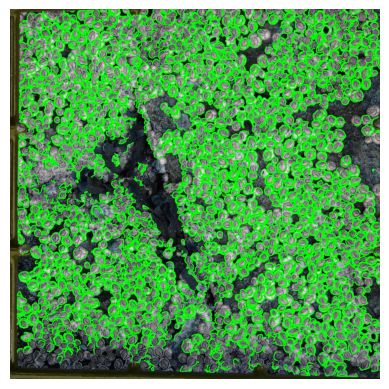

In [42]:
# Following are the coordinates of the top-left corner of the center square
x = 1100
y = 500
# Dimension of the center square
size = 1436

centerImage = extractCenterArea('img1.png', x, y, size)
blur = preProcessImage(centerImage)
contours = revealEdgesAndContours(centerImage, blur)

# Display the image with contours. Note that I've commented out this as cv2.imshow() does not directly display within Jupyter.
# cv2.imshow(str(len(contours)), centerImage)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print("Number of barnacles is ", len(contours))

# Display the image within Jupyter Notebook
plt.imshow(centerImage)
plt.axis('off') # Optional: Hides the axes
plt.show()


**Experiment 2** Count of barnacles in `img2.png`

The following code counts the number of barnacles in `img2.png`. Note that we use a pre-processing step to identify the coordinates of the top-left corner of the center square as `x=940` and `y=470`.

Number of barnacles is  1479


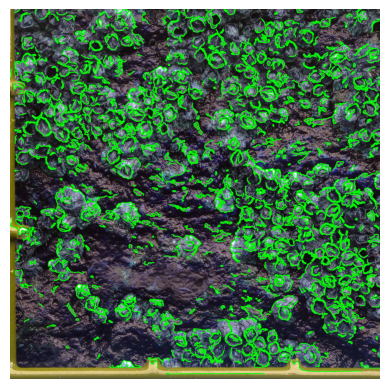

In [43]:
# Following are the coordinates of the top-left corner of the center square
x = 940
y = 470
# Dimension of the center square
size = 1436

centerImage = extractCenterArea('img2.png', x, y, size)
blur = preProcessImage(centerImage)
contours = revealEdgesAndContours(centerImage, blur)

print("Number of barnacles is ", len(contours))

# Display the image within Jupyter Notebook
plt.imshow(centerImage)
plt.axis('off') # Optional: Hides the axes
plt.show()

**Experiment 3** Count of barnacles in `masked_img1.png`

The following code counts the number of barnacles in `masked_img1.png`. This is an exact copy of the center square region of `img1.png`, except that the contours of the barnacles are pronounced and stand out from the background. Therefore, if we run our code on this image, we should expect nearly the same number of barnacles as we found earlier for `img1.png`.

Number of barnacles is  3002


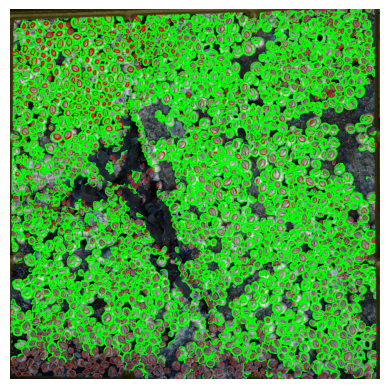

In [44]:
# Following are the coordinates of the top-left corner of the center square
x = 0
y = 0
# Dimension of the center square
size = 1436

centerImage = extractCenterArea('masked_img1.png', x, y, size)
blur = preProcessImage(centerImage)
contours = revealEdgesAndContours(centerImage, blur)

print("Number of barnacles is ", len(contours))

# Display the image within Jupyter Notebook
plt.imshow(centerImage)
plt.axis('off') # Optional: Hides the axes
plt.show()

**Analysis**: The output against `masked_img1.png` is 3002, which is 11.7% higher than what we obtained with the original image, `img1.png`, which was 2651. Therefore, our algorithm against the original unmaksed image undercounts the number of barnacles. This is expected as the manual annotation is expected to provide sharper edges and contours.

**Experiment 4** Count of barnacles in `masked_img2.png`

The following code counts the number of barnacles in `masked_img2.png`. This is an exact copy of the center square region of `img1.png`, except that the contours of the barnacles are pronounced and stand out from the background. Therefore, if we run our code on this image, we should expect nearly the same number of barnacles as we found earlier for `img2.png`.

Number of barnacles is  1368


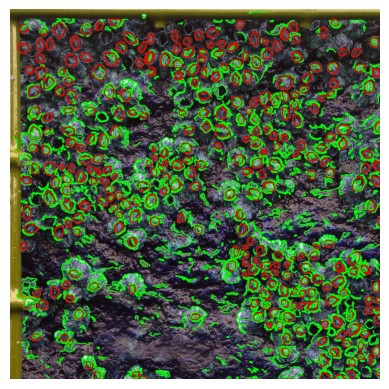

In [45]:
# Following are the coordinates of the top-left corner of the center square
x = 0
y = 0
# Dimension of the center square
size = 1436

centerImage = extractCenterArea('masked_img2.png', x, y, size)
blur = preProcessImage(centerImage)
contours = revealEdgesAndContours(centerImage, blur)

print("Number of barnacles is ", len(contours))

# Display the image within Jupyter Notebook
plt.imshow(centerImage)
plt.axis('off') # Optional: Hides the axes
plt.show()

**Analysis**: The output against `masked_img2.png` is 1368, which is 7.5% lower than what we obtained with the original image, `img2.png`, which was 1479. Therefore, our algorithm against the original unmaksed image overcounts the number of barnacles. It's likely that the darker background of `img2.png` introduces noise in detecting the edges.

**Experiment 5** Count of barnacles in `unseen_img1.png`

Number of barnacles is  1788


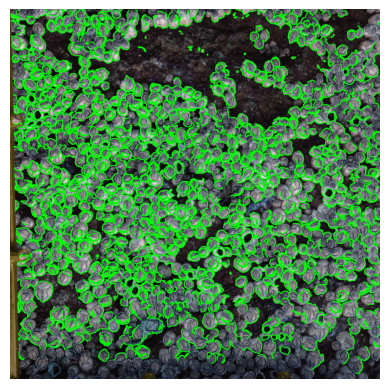

In [46]:
# Following are the coordinates of the top-left corner of the center square
x = 1000
y = 300
# Dimension of the center square
size = 1436

centerImage = extractCenterArea('unseen_img1.png', x, y, size)
blur = preProcessImage(centerImage)
contours = revealEdgesAndContours(centerImage, blur)

print("Number of barnacles is ", len(contours))

# Display the image within Jupyter Notebook
plt.imshow(centerImage)
plt.axis('off') # Optional: Hides the axes
plt.show()

**Experiment 6** Count of barnacles in `unseen_img2.png`

Number of barnacles is  312


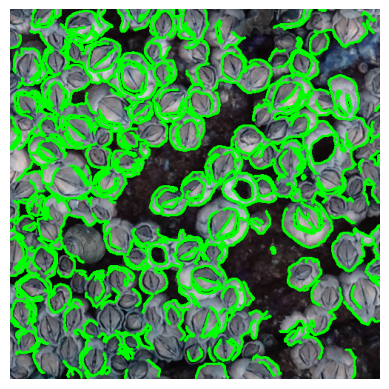

In [49]:
# Following are the coordinates of the top-left corner of the center square
x = 0
y = 0
# Dimension of the center square
size = 1436

centerImage = extractCenterArea('unseen_img2.png', x, y, size)
blur = preProcessImage(centerImage)
contours = revealEdgesAndContours(centerImage, blur)

print("Number of barnacles is ", len(contours))

# Display the image within Jupyter Notebook
plt.imshow(centerImage)
plt.axis('off') # Optional: Hides the axes
plt.show()

## Conclusion

In this project, we automated barnacle counting in coastal tide pools using OpenCV. First, we converted the image (captured from the center square of a wire frame) to grayscale and applied Gaussian blur to reduce noise. Next, we used OpenCV’s Canny() algorithm to detect barnacle edges and the findContours() API to extract their contours. Our experimental results closely matched manual counts when accounting for image noise and errors. While we optimized the Gaussian blur parameters, the findings suggest that adjustments may still be needed based on image quality and background variations.

This OpenCV-based approach enables rapid estimation of barnacle density by randomly sampling with the wire frame and processing representative images across large areas. The total barnacle count can then be extrapolated from these samples to the entire region of interest.